In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

# Load the two parts of the data
data = pd.read_csv(
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/"
    "IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
)
X = pd.read_csv(
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/"
    "IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
)

# Extract Y (the Class column) as a numpy array
Y = data["Class"].to_numpy()

# Standardize X
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

print("X shape:", X.shape, "Y shape:", Y.shape)


X shape: (90, 83) Y shape: (90,)


In [2]:
# %% [markdown]
# ## TASK 3: Train/Test Split


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2, stratify=Y
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (72, 83), Test shape: (18, 83)


In [4]:
# %% [markdown]
# ## TASK 4 & 5: Logistic Regression + Evaluation


In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    """
    Plots a confusion matrix for the given true and predicted labels.
    """
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Did Not Land', 'Landed'])
    ax.yaxis.set_ticklabels(['Did Not Land', 'Landed'])
    plt.show()


=== Logistic Regression ===
 Best params:    {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
 CV accuracy:   0.8500
 Test accuracy: 0.8333


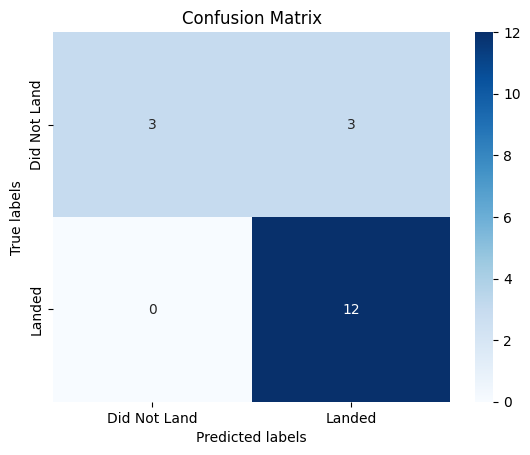

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Grid for logistic regression
param_lr = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
logreg_cv = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_lr,
    cv=10,
    n_jobs=-1
)
logreg_cv.fit(X_train, Y_train)

yhat_lr = logreg_cv.predict(X_test)
print("=== Logistic Regression ===")
print(" Best params:   ", logreg_cv.best_params_)
print(" CV accuracy:   {:.4f}".format(logreg_cv.best_score_))
print(" Test accuracy: {:.4f}".format(accuracy_score(Y_test, yhat_lr)))
plot_confusion_matrix(Y_test, yhat_lr)


In [ ]:
# %% [markdown]
# ## TASK 6 & 7: Support Vector Machine + Evaluation



=== SVM ===
 Best params:    {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
 CV accuracy:   0.8643
 Test accuracy: 0.8333


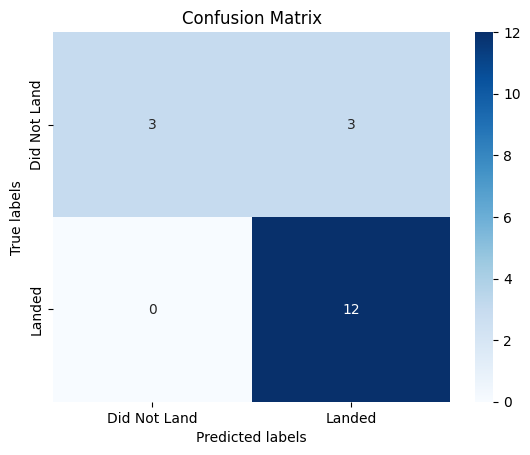

In [8]:
from sklearn.svm import SVC

param_svc = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}
svm_cv = GridSearchCV(
    SVC(),
    param_svc,
    cv=10,
    n_jobs=-1
)
svm_cv.fit(X_train, Y_train)

yhat_svc = svm_cv.predict(X_test)
print("\n=== SVM ===")
print(" Best params:   ", svm_cv.best_params_)
print(" CV accuracy:   {:.4f}".format(svm_cv.best_score_))
print(" Test accuracy: {:.4f}".format(accuracy_score(Y_test, yhat_svc)))
plot_confusion_matrix(Y_test, yhat_svc)


In [9]:
# %% [markdown]
# ## TASK 8 & 9: Decision Tree + Evaluation



=== Decision Tree ===
 Best params:    {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
 CV accuracy:   0.9036
 Test accuracy: 0.6667


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2628 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~

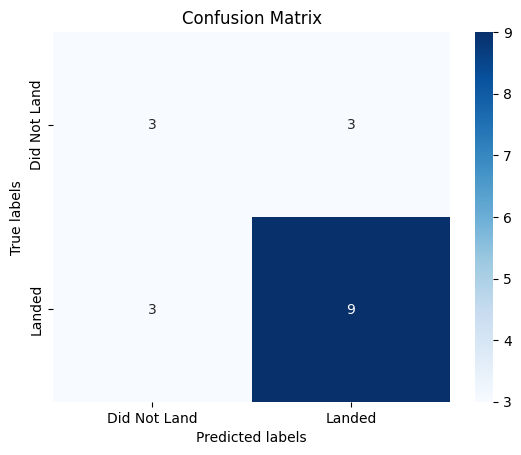

In [10]:
from sklearn.tree import DecisionTreeClassifier

param_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(2, 20, 2)),
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}
tree_cv = GridSearchCV(
    DecisionTreeClassifier(),
    param_dt,
    cv=10,
    n_jobs=-1
)
tree_cv.fit(X_train, Y_train)

yhat_dt = tree_cv.predict(X_test)
print("\n=== Decision Tree ===")
print(" Best params:   ", tree_cv.best_params_)
print(" CV accuracy:   {:.4f}".format(tree_cv.best_score_))
print(" Test accuracy: {:.4f}".format(accuracy_score(Y_test, yhat_dt)))
plot_confusion_matrix(Y_test, yhat_dt)


In [ ]:
# %% [markdown]
# ## TASK 10 & 11: K-Nearest Neighbors + Evaluation



=== KNN ===
 Best params:    {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
 CV accuracy:   0.8643
 Test accuracy: 0.7778


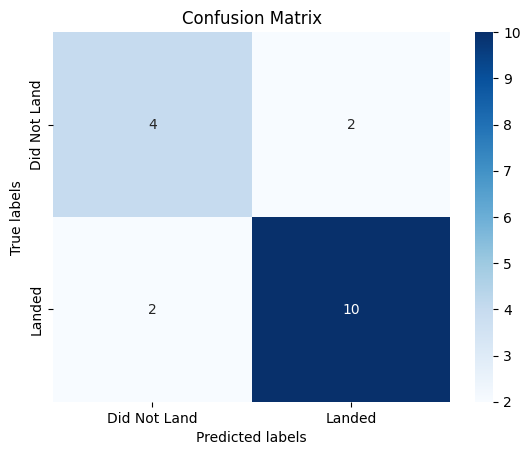

In [11]:
from sklearn.neighbors import KNeighborsClassifier

param_knn = {
    'n_neighbors': list(range(1, 11)),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
knn_cv = GridSearchCV(
    KNeighborsClassifier(),
    param_knn,
    cv=10,
    n_jobs=-1
)
knn_cv.fit(X_train, Y_train)

yhat_knn = knn_cv.predict(X_test)
print("\n=== KNN ===")
print(" Best params:   ", knn_cv.best_params_)
print(" CV accuracy:   {:.4f}".format(knn_cv.best_score_))
print(" Test accuracy: {:.4f}".format(accuracy_score(Y_test, yhat_knn)))
plot_confusion_matrix(Y_test, yhat_knn)


In [ ]:
# %% [markdown]
# ## TASK 12: Compare All Models


In [12]:
import pandas as pd

results = pd.DataFrame([
    ["Logistic Regression", logreg_cv.best_score_, logreg_cv.score(X_test, Y_test)],
    ["SVM",                 svm_cv.best_score_,    svm_cv.score(X_test, Y_test)],
    ["Decision Tree",       tree_cv.best_score_,   tree_cv.score(X_test, Y_test)],
    ["KNN",                 knn_cv.best_score_,    knn_cv.score(X_test, Y_test)],
], columns=["Model", "CV Accuracy", "Test Accuracy"])

print("\n=== Summary ===")
results



=== Summary ===


,Model,CV Accuracy,Test Accuracy
0,Logistic Regression,0.850000,0.833333
1,SVM,0.864286,0.833333
2,Decision Tree,0.903571,0.666667
3,KNN,0.864286,0.777778
